   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  ...  \
0 2003-02-24       1         2     2003  Motorcycles  ...   
1 2003-07-05       2         5     2003  Motorcycles  ...   
2 2003-01-07       3         7     2003  Motorcycles  ...   
3 2003-08-25       3         8     2003  Motorcycles  ...   
4 2003-10-10       4        10     2003  Motorcycles  ...   

                    ADDRESSLINE1 ADDRESSLINE2           CITY STATE POSTALCODE  \
0        897 Long Airport Avenue          NaN            NYC    NY      10022   
1             59 rue de l'Abbaye      

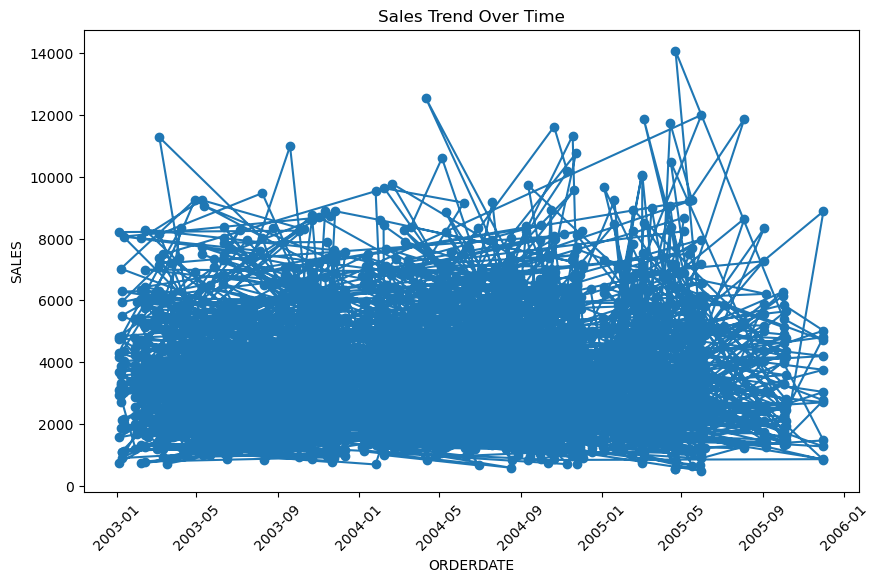

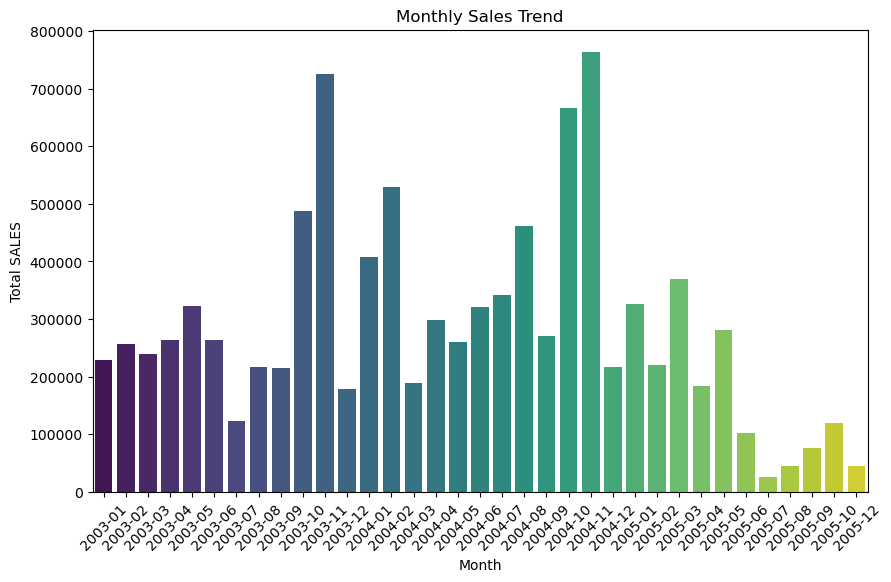

c:\Users\UserPC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


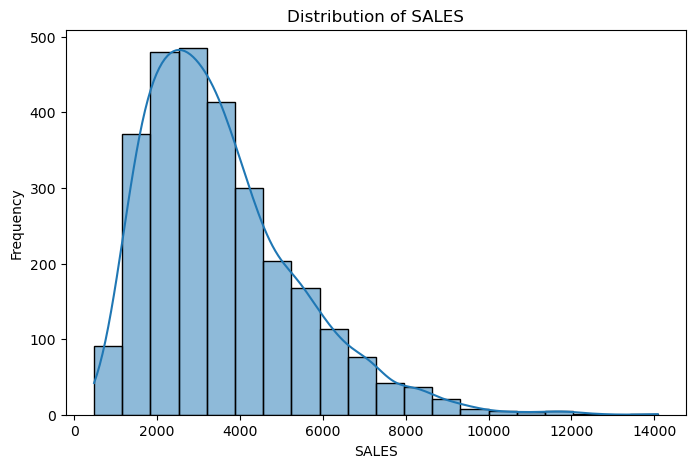

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file (replace with your file path)
df = pd.read_excel(r"C:\Users\UserPC\Downloads\E.on sales data.xlsx")

# Converting the 'ORDERDATE' column to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Displaying the first few rows to check the result
print(df.head())

# Sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['ORDERDATE'], df['SALES'], marker='o')  # Fix: Changed 'sales_data' to 'df'
plt.title('Sales Trend Over Time')
plt.xlabel('ORDERDATE')
plt.ylabel('SALES')
plt.xticks(rotation=45)
plt.show()

# Group data by month for monthly sales trend
df['Month'] = df['ORDERDATE'].dt.to_period('M')  # Create a 'Month' column
monthly_sales = df.groupby('Month')['SALES'].sum().reset_index()  # Aggregate sales by month

# Monthly sales trend
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='SALES', data=monthly_sales, palette='viridis')  # Fix: Added 'monthly_sales' dataframe
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total SALES')
plt.xticks(rotation=45)
plt.show()

# Distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['SALES'], bins=20, kde=True)  # Fix: Changed 'sales_data' to 'df'
plt.title('Distribution of SALES')
plt.xlabel('SALES')
plt.ylabel('Frequency')
plt.show()
